In [1]:
import nltk
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.utils import to_categorical

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akmal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akmal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akmal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [21]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.max_rows', 100)      # Bisa disesuaikan untuk baris
pd.set_option('display.width', None)        # Biarkan lebar layar fleksibel
pd.set_option('display.max_colwidth', None) # Tampilkan isi kolom panjang


# Text Preprocessing

In [37]:

df = pd.read_csv('dataset/prabowo_w11wo_90.csv')
df1 = pd.read_csv('dataset/text/prabowo_text_positive1000.csv')
df1 = df1.rename(columns={'text':'full_text'})
df = pd.concat([df1, df], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6254 entries, 0 to 5253
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   float64
 1   full_text        6254 non-null   object 
 2   label            6254 non-null   object 
 3   text_processed   5254 non-null   object 
 4   text_processed1  5254 non-null   object 
 5   score            5254 non-null   float64
 6   panjang          5254 non-null   float64
dtypes: float64(3), object(4)
memory usage: 390.9+ KB


In [128]:
df = pd.read_csv('df_20like_labelled.csv')

In [129]:
df.tail()

,Unnamed: 0,full_text,text_processed,label,score
3208,3208,@FPFeliz @rachmanfachri @salam4jari @OCCRP @prabowo Biasalah bersihin nama. Kan kaum 58% bodo amat sama kinerja yg penting gemoy imut savage fufufafa ganteng dsb. Jadi bawa cucu jalan2 biar keliatan figure baik bagus lalu ditambah aja buzzer meramaikan post biar tenggelam OCCRPnya,fpfeliz rachmanfachri salam jari occrp prabowo biasalah bersihin nama kan kaum bodo amat sama kinerja yang penting gemoy imut savage fufufafa ganteng dsb jadi bawa cucu jalan biar keliatan figure baik bagus lalu ditambah aja buzzer meramaikan post biar tenggelam occrpnya,neutral,0.983480
3209,3209,Kapolri Jenderal Listyo Sigit Prabowo menyampaikan evaluasi kinerja Polri termasuk melalui analisis sentimen di media sosial Selama tahun 2024 ada 7 juta interaksi di media sosial yang berkaitan dengan Polri. ■ Sentimen positif sebesar 37%. ■ sentimen netral 18%. ■ https://t.co/nWkJgGvo2c,kapolri jenderal listyo sigit prabowo menyampaikan evaluasi kinerja polri termasuk melalui analisis sentimen di media sosial selama tahun ada juta interaksi di media sosial yang berkaitan dengan polri sentimen positif sebesar sentimen netral,negative,0.872358
3210,3210,Logika ..️ Tanpa logistik sama dg anarkis .. ini sama dg pemerintahan Bpk Presiden @prabowo skrg bukan hanya kinerja yg jd awasan masyarakat tp juga moralitasnya‼️ Cek vonis kedua KORUPTOR TIMAH 300T‼️ Ayyoo berbenah pak Presiden https://t.co/GPqlrEjuqg,logika tanpa logistik sama dg anarkis ini sama dg pemerintahan bpk presiden prabowo skrg bukan hanya kinerja yang jd awasan masyarakat tp juga moralitasnya cek vonis kedua koruptor timah ayyoo berbenah pak presiden,negative,0.636877
3211,3211,Pola Pola Klasik Kinerja Pembantu Presiden Seperti ini mohon untuk ditingglkan Prabowo Ya @prabowo ! Jadilah seorang Prabowo tidak perlu menjadi sosok lain! Before After https://t.co/TcdY1xxSut,pola pola klasik kinerja pembantu presiden seperti ini mohon untuk ditingglkan prabowo ya prabowo jadilah seorang prabowo tidak perlu menjadi sosok lain before after,neutral,0.751930
3212,3212,@kegblgnunfaedh Ini era pak prabowo Tidak ada orang yg kebal hukum. Selama ini masyarakat menilai KAPOLRI TIDUR. Kinerja nya sangat jauh dari apa yg diharapkan Maka perlu mempertimbangkan presiden mencari orang yg tegas untuk mengganti KAPOLRI.,kegblgnunfaedh ini era pak prabowo tidak ada orang yang kebal hukum selama ini masyarakat menilai kapolri tidur kinerja nya sangat jauh dari apa yang diharapkan maka perlu mempertimbangkan presiden mencari orang yang tegas untuk mengganti kapolri,negative,0.816350


In [39]:
df = df.drop(
    df[df['label'] == 'neutral'].sample(n=2000, random_state=42).index
).reset_index(drop=True)


In [130]:
df['label'].value_counts()

label
neutral     1925
negative     770
positive     518
Name: count, dtype: int64

In [131]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Inisialisasi stemmer dan stopwords
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

# Mention penting yang ingin disimpan (whitelist)
mention_whitelist = ['prabowo']

# Kamus normalisasi kata informal → formal
normalisasi_kata = {
    'gak': 'tidak',
    'ga': 'tidak',
    'yg': 'yang',
    'utk': 'untuk',
    'dgn': 'dengan',
    'apik': 'baik',
    'sdh': 'sudah',
    'krn': 'karena',
    'apik': 'bagus',
    'tdk': 'tidak',
    'klo': 'kalo',
    'sbg': 'sebagai',
    'gue': 'aku',
    'aja': '',
    'amp': '',
    'nya': '',
    'ya': '',
    'gitu': '',
    'loh': '',
    'dong': '',
    'sih': '',
    'deh': '',
    'nih': '',
    'kok': '',
}

def preprocessing(text):
    # 2. Tangani mention: simpan jika ada di whitelist, hapus lainnya
    text = re.sub(r'@(\w+)', lambda m: m.group() if m.group(1).lower() in mention_whitelist else '', text)

    text = re.sub(r'http\S+|www\S+|<.*?>|#', ' ', text)
    
    # 4. Hapus tag HTML (jika ada)
    text = re.sub(r'<.*?>', '', text)

    # 5. Hapus karakter non-huruf (angka, simbol)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # 6. Lowercase
    text = text.lower()

    # 7. Tokenisasi
    tokens = word_tokenize(text)

    # 8. Normalisasi kata informal
    tokens = [normalisasi_kata.get(word, word) for word in tokens]

    # 9. Hapus stopwords dan kata kosong/panjang pendek
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2 and word != '']

    # Gabungkan kembali sebelum stemming (karena Sastrawi menerima string)
    text = ' '.join(tokens)

    # Stemming
    # stemmed_text = stemmer.stem(text)

    return text


In [132]:
def apply_with_progress(df, func, column, new_column, step=50):
    result = []
    for i, text in enumerate(df[column]):
        result.append(func(text))
        if (i + 1) % step == 0 or (i + 1) == len(df):
            print(f"Processed {i + 1}/{len(df)} rows")
    df[new_column] = result
    return df

# Contoh pemakaian
df = apply_with_progress(df, preprocessing, 'full_text', 'text_processed')
df.head()


Processed 50/3213 rows
Processed 100/3213 rows
Processed 150/3213 rows
Processed 200/3213 rows
Processed 250/3213 rows
Processed 300/3213 rows
Processed 350/3213 rows
Processed 400/3213 rows
Processed 450/3213 rows
Processed 500/3213 rows
Processed 550/3213 rows
Processed 600/3213 rows
Processed 650/3213 rows
Processed 700/3213 rows
Processed 750/3213 rows
Processed 800/3213 rows
Processed 850/3213 rows
Processed 900/3213 rows
Processed 950/3213 rows
Processed 1000/3213 rows
Processed 1050/3213 rows
Processed 1100/3213 rows
Processed 1150/3213 rows
Processed 1200/3213 rows
Processed 1250/3213 rows
Processed 1300/3213 rows
Processed 1350/3213 rows
Processed 1400/3213 rows
Processed 1450/3213 rows
Processed 1500/3213 rows
Processed 1550/3213 rows
Processed 1600/3213 rows
Processed 1650/3213 rows
Processed 1700/3213 rows
Processed 1750/3213 rows
Processed 1800/3213 rows
Processed 1850/3213 rows
Processed 1900/3213 rows
Processed 1950/3213 rows
Processed 2000/3213 rows
Processed 2050/3213 

,Unnamed: 0,full_text,text_processed,label,score
0,0,Blm pernah terjadi di dunia sekalipun. 3 Presiden pilihan rakyat begitu asik bernyanyi trio dgn mengenakan seragam militer. @prabowo @jokowi dan @SBYudhoyono . Meskipun Pak Jokowi kurang hapal lagunya https://t.co/FDeXA046JE,blm dunia presiden pilihan rakyat asik bernyanyi trio mengenakan seragam militer prabowo jokowi hapal lagunya,neutral,0.990808
1,1,Kesempatan langka Bpk Presiden Prabowo berbicara di hadapan anak bangsa terbaik Anak Bu Mega Anak Pak SBY Anak Pak Jokowi Beliau sendiri mantan menantu Presiden dan anak Menteri Obrolannya msh tentang bergiliran kuasa Di tengah segala masalah bangsa kita ikut tepuk tangan,kesempatan langka bpk presiden prabowo berbicara hadapan anak bangsa terbaik anak mega anak sby anak jokowi beliau mantan menantu presiden anak menteri obrolannya msh bergiliran kuasa bangsa tepuk tangan,negative,0.660980
2,2,3 Oktober 2011 dan saat belum berkuasa menjadi Presiden Republik Indonesia bapak @prabowo pernah menyatakan dukungan hukuman mati bagi Koruptor. Kini Saatnya bapak buktikan pada dunia bahwa bapak bukan seorang politikus busuk yang mengoceh saat belum berkuasa namun ketika https://t.co/Oli1AZlXsz,oktober berkuasa presiden republik indonesia prabowo dukungan hukuman mati koruptor buktikan dunia politikus busuk mengoceh berkuasa,neutral,0.907986
3,3,Kadrun sudah mulai turun ke jalan artinya Presiden Prabowo sdh di jalan yang benar,kadrun turun jalan presiden prabowo jalan,neutral,0.754233
4,4,Pengelolaan hutan bukan sekadar memiliki izin tetapi tentang tanggung jawab. Dalam Rapat Kerja bersama Komisi IV DPR RI saya menegaskan bahwa @kemenhut_ri akan terus menertibkan dan mencabut PBPH yang tidak menjalankan kewajibannya sesuai perintah Presiden @prabowo. Hingga https://t.co/3vNnmKBebf,pengelolaan hutan memiliki izin tanggung rapat kerja komisi dpr menertibkan mencabut pbph menjalankan kewajibannya sesuai perintah presiden prabowo,neutral,0.941591


In [133]:
df.tail()

,Unnamed: 0,full_text,text_processed,label,score
3208,3208,@FPFeliz @rachmanfachri @salam4jari @OCCRP @prabowo Biasalah bersihin nama. Kan kaum 58% bodo amat sama kinerja yg penting gemoy imut savage fufufafa ganteng dsb. Jadi bawa cucu jalan2 biar keliatan figure baik bagus lalu ditambah aja buzzer meramaikan post biar tenggelam OCCRPnya,prabowo biasalah bersihin nama kaum bodo kinerja gemoy imut savage fufufafa ganteng dsb bawa cucu jalan biar keliatan figure bagus ditambah buzzer meramaikan post biar tenggelam occrpnya,neutral,0.983480
3209,3209,Kapolri Jenderal Listyo Sigit Prabowo menyampaikan evaluasi kinerja Polri termasuk melalui analisis sentimen di media sosial Selama tahun 2024 ada 7 juta interaksi di media sosial yang berkaitan dengan Polri. ■ Sentimen positif sebesar 37%. ■ sentimen netral 18%. ■ https://t.co/nWkJgGvo2c,kapolri jenderal listyo sigit prabowo evaluasi kinerja polri analisis sentimen media sosial juta interaksi media sosial berkaitan polri sentimen positif sentimen netral,negative,0.872358
3210,3210,Logika ..️ Tanpa logistik sama dg anarkis .. ini sama dg pemerintahan Bpk Presiden @prabowo skrg bukan hanya kinerja yg jd awasan masyarakat tp juga moralitasnya‼️ Cek vonis kedua KORUPTOR TIMAH 300T‼️ Ayyoo berbenah pak Presiden https://t.co/GPqlrEjuqg,logika logistik anarkis pemerintahan bpk presiden prabowo skrg kinerja awasan masyarakat moralitasnya cek vonis koruptor timah ayyoo berbenah presiden,negative,0.636877
3211,3211,Pola Pola Klasik Kinerja Pembantu Presiden Seperti ini mohon untuk ditingglkan Prabowo Ya @prabowo ! Jadilah seorang Prabowo tidak perlu menjadi sosok lain! Before After https://t.co/TcdY1xxSut,pola pola klasik kinerja pembantu presiden mohon ditingglkan prabowo prabowo prabowo sosok before after,neutral,0.751930
3212,3212,@kegblgnunfaedh Ini era pak prabowo Tidak ada orang yg kebal hukum. Selama ini masyarakat menilai KAPOLRI TIDUR. Kinerja nya sangat jauh dari apa yg diharapkan Maka perlu mempertimbangkan presiden mencari orang yg tegas untuk mengganti KAPOLRI.,era prabowo orang kebal hukum masyarakat menilai kapolri tidur kinerja diharapkan mempertimbangkan presiden mencari orang mengganti kapolri,negative,0.816350


In [134]:
from collections import Counter
import re

df_copy = df.copy()

# Gabungkan semua teks jadi satu string
text = ' '.join(df_copy['text_processed'].astype(str))

# Preprocessing: lowercase + tokenisasi
words = re.findall(r'\b\w+\b', text.lower())

# Hitung frekuensi kata
freq = Counter(words)

# Ambil 50 kata paling sering
top_50 = freq.most_common(150)

# Cetak hasil
for word, count in top_50:
    print(f"{word}: {count}")


prabowo: 3811
presiden: 3301
rakyat: 650
jokowi: 571
indonesia: 549
subianto: 509
negara: 426
menteri: 304
orang: 212
kinerja: 194
tni: 153
anak: 148
kabinet: 146
program: 143
gibran: 142
pemerintahan: 137
kebijakan: 136
kalo: 135
korupsi: 120
beliau: 118
kepala: 118
laut: 116
mulyono: 115
hukum: 114
pemerintah: 114
langsung: 111
masyarakat: 109
pagar: 109
pejabat: 107
bangsa: 106
partai: 103
khusus: 101
polri: 101
omon: 100
makan: 96
koruptor: 95
kerja: 95
salah: 95
ketua: 95
negeri: 95
mantan: 94
jakarta: 94
dunia: 91
berani: 91
daerah: 90
udah: 90
miftah: 89
utusan: 88
bikin: 87
anggaran: 84
budi: 80
perintah: 79
istana: 78
politik: 77
nasional: 77
semoga: 76
kapolri: 76
wapres: 75
uang: 75
jenderal: 74
kasih: 71
bilang: 69
yth: 68
ppn: 68
pemimpin: 67
wakil: 67
republik: 66
hidup: 66
bpk: 64
video: 64
ekonomi: 64
gratis: 64
publik: 64
pdip: 63
mohon: 63
pidato: 61
tolong: 60
kunjungan: 59
guru: 59
polisi: 58
jabatan: 58
hasil: 58
pik: 58
tanah: 57
terkait: 57
mentri: 57
terima: 56


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# df1 = df.copy()
# df1['panjang'] = df1['text_processed'].apply(lambda x: len(x.split()))
sns.histplot(df['panjang'], bins=30)

KeyError: 'panjang'

In [136]:
import pandas as pd

# Misal df1 dan df2 sudah ada dan punya kolom yang sama
df['label_num'] = df['label'].replace({'neutral' : 0, 'positive' : 1, 'negative' : 2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3213 non-null   int64  
 1   full_text       3213 non-null   object 
 2   text_processed  3213 non-null   object 
 3   label           3213 non-null   object 
 4   score           3213 non-null   float64
 5   label_num       3213 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 150.7+ KB


In [137]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# 1. Inisialisasi dan fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text_processed'])

# 2. Tentukan MAX_WORDS berdasarkan jumlah kata unik
total_kata_unik = len(tokenizer.word_index)
print("Jumlah kata unik:", total_kata_unik)

# Atur MAX_WORDS agar tidak terlalu besar
if total_kata_unik > 20000:
    MAX_WORDS = 15000
elif total_kata_unik > 10000:
    MAX_WORDS = total_kata_unik
else:
    MAX_WORDS = total_kata_unik

print("MAX_WORDS yang digunakan:", MAX_WORDS)

Jumlah kata unik: 10907
MAX_WORDS yang digunakan: 10907


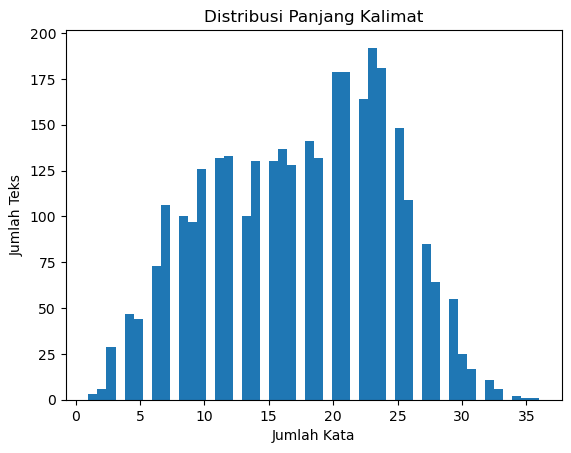

MAX_LEN (persentil 95): 36


In [138]:
# 3. Hitung panjang tiap kalimat
sequences = tokenizer.texts_to_sequences(df['text_processed'])
panjang_kalimat = [len(seq) for seq in sequences]

# 4. Tentukan MAX_LEN berdasarkan distribusi panjang
plt.hist(panjang_kalimat, bins=50)
plt.title('Distribusi Panjang Kalimat')
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Teks')
plt.show()

MAX_LEN = int(np.percentile(panjang_kalimat, 100))
print("MAX_LEN (persentil 95):", MAX_LEN)

In [139]:
# 5. Lakukan ulang tokenizer dengan batasan MAX_WORDS
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text_processed'])
sequences = tokenizer.texts_to_sequences(df['text_processed'])

# 6. Padding sequences
padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

# Feature Engineering

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
    padded, df['label_num'], test_size=0.3, random_state=42, stratify=df['label_num']
)
y_train.value_counts(), y_test.value_counts()

(label_num
 0    1347
 2     539
 1     363
 Name: count, dtype: int64,
 label_num
 0    578
 2    231
 1    155
 Name: count, dtype: int64)

# Model Architecture Definition

# Training Model

In [141]:
import numpy as np
print(np.unique(y_train, return_counts=True))  # Cek distribusi kelas

(array([0, 1, 2], dtype=int64), array([1347,  363,  539], dtype=int64))


In [142]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.5565454095520911, 1: 2.0651974288337924, 2: 1.390847247990105}

In [143]:
import numpy as np
from gensim.models import KeyedVectors

# Load model FastText Bahasa Indonesia
fasttext_model = KeyedVectors.load_word2vec_format('cc.id.300.vec', limit=50000)  # optional limit

# Buat embedding matrix
embedding_dim = 300
embedding_matrix = np.zeros((MAX_WORDS, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < MAX_WORDS:
        if word in fasttext_model:
            embedding_matrix[i] = fasttext_model[word]
        else:
            embedding_matrix[i] = np.random.normal(0, 0.1, embedding_dim)  # fallback


In [173]:
from keras.layers import Embedding, LSTM, Dense, Dropout, GRU, BatchNormalization, Input, Dense, Dropout, LSTM, Bidirectional 
from keras.models import Sequential
from keras import regularizers  
from keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.metrics import Recall, Precision
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K



model = Sequential()
model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_dim, 
        weights=[embedding_matrix],
        input_length=MAX_LEN,
        trainable=True))

model.add((LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))))
model.add(Dropout(0.2))

# Layer GRU kedua
model.add(LSTM(64, kernel_regularizer=regularizers.l2(0.01)))

# Output layer
model.add(Dense(3, activation='softmax'))

# Kompilasi model dengan learning rate yang lebih kecil
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer= Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Callback ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',         # Nama file model yang disimpan
    monitor='val_loss',               # Metrik yang dipantau
    save_best_only=True,             # Simpan hanya model terbaik
    mode='min',                      # Karena kita ingin meminimalkan val_loss
    verbose=1                        # Tampilkan log penyimpanan
)

# Callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  
    restore_best_weights=True
)
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint],
    class_weight=class_weights  
)

KeyboardInterrupt: 

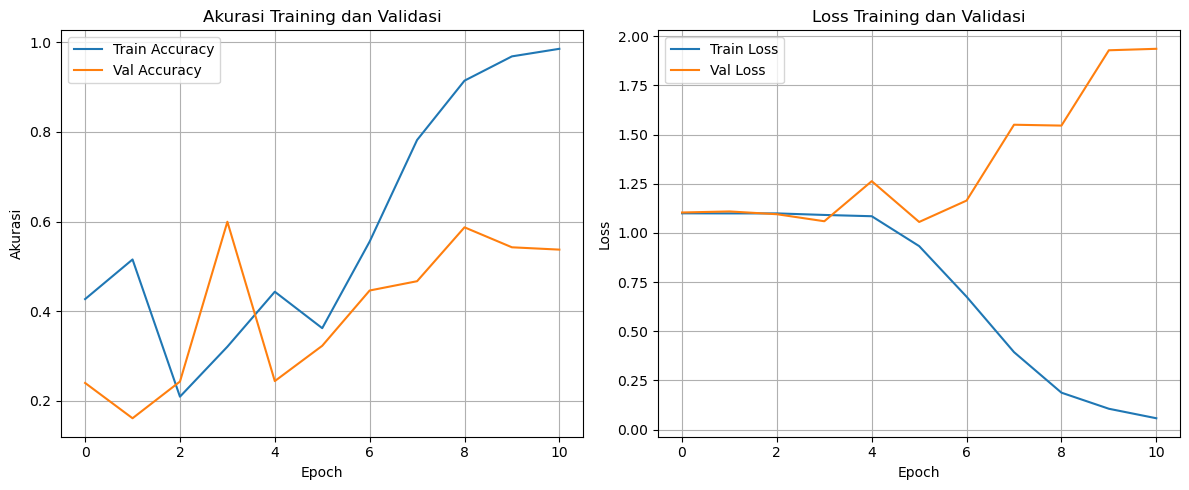

In [158]:
import matplotlib.pyplot as plt

# Ambil data dari history
history_dict = history.history

# --- Plot Accuracy ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# --- Plot Loss ---
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.title('Loss Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


31/31 [==============================] - 2s 18ms/step


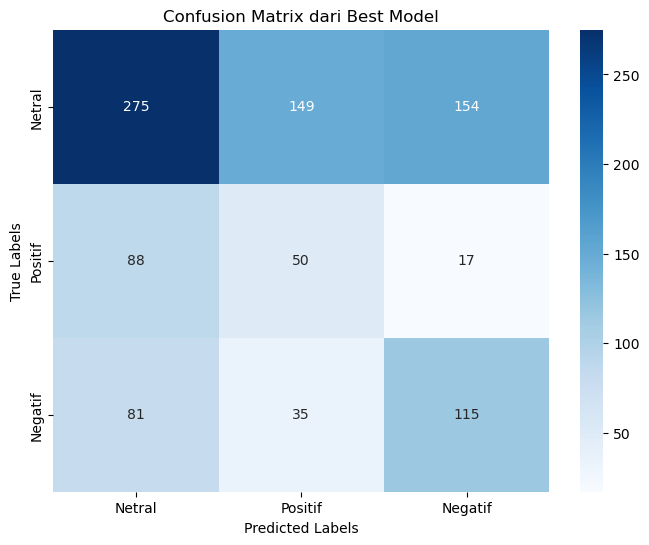

              precision    recall  f1-score   support

      Netral       0.62      0.48      0.54       578
     Positif       0.21      0.32      0.26       155
     Negatif       0.40      0.50      0.44       231

    accuracy                           0.46       964
   macro avg       0.41      0.43      0.41       964
weighted avg       0.50      0.46      0.47       964



In [167]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load model terbaik
best_model = load_model("best_model.h5")

# Prediksi dengan model terbaik
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['Netral', 'Positif', 'Negatif']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix dari Best Model')
plt.show()

# Laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=class_names))


In [160]:
y_train[:5]

2155    0
2051    0
993     0
2885    0
1782    0
Name: label_num, dtype: int64